Census Income

Project Description:- 

The project involves using a dataset extracted from the 1994 Census Bureau database to predict whether an individual's income exceeds  50,000 doller per year. The dataset includes various features, such as age, income, and hours worked per week, with the goal of building a predictive model to classify individuals into two income groups: above 50,000 doller or not. The dataset has been preprocessed to ensure data quality, and it includes a "final weight" feature for population representativeness. The project's objective is to develop a machine learning model for income prediction based on these factors.

Dataset Link- https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv

In [1]:
# Importing neccessary librarys
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Load data set through pandas library
df= pd.read_csv(r"C:\Users\ganes\Downloads\dataset1-master\census_income.csv")
df.head(10)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [3]:
# Data type of columns 
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [4]:
# For checking dataset diemensions 
df.shape 

(32560, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
# Summarizing the distribution of the numerical variables.
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Checking for missing value

In [7]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [8]:
df['Income'].nunique()

2

Labeled columns have 2 unique category that mean Classification problem.

Value count of Categorical columns 

In [9]:
df['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

In [10]:
df['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [11]:
# replace ? with Unknown name in column workclass 
df['Workclass'] = df['Workclass'].str.strip()
df['Workclass'].replace('?', 'Unknown', inplace=True)

In [12]:
df['Education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

In [13]:
df['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [14]:
# replace ? with Unknown name in column Occupation 
df['Occupation'] = df['Occupation'].str.strip()
df['Occupation'].replace('?', 'Unknown', inplace=True)

In [15]:
df['Relationship'].value_counts()

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

In [16]:
df['Marital_status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

In [17]:
df['Race'].value_counts()

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

In [18]:
df['Native_country'].value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [19]:
# replace ? with Unknown name in column Native_country
df['Native_country'] = df['Native_country'].str.strip()
df['Native_country'].replace('?', 'Unknown', inplace=True)

All of these columns contain high numbers of categorical data. 

In [20]:
# The 'fnlwgt' doesn't align with our modeling objectives or we are not working with survey data to representative of the U.S. population.
# We drop this column from dataset. 
df.drop('Fnlwgt', axis=1, inplace=True)

Data Visualization

1.Using Univariate Plots

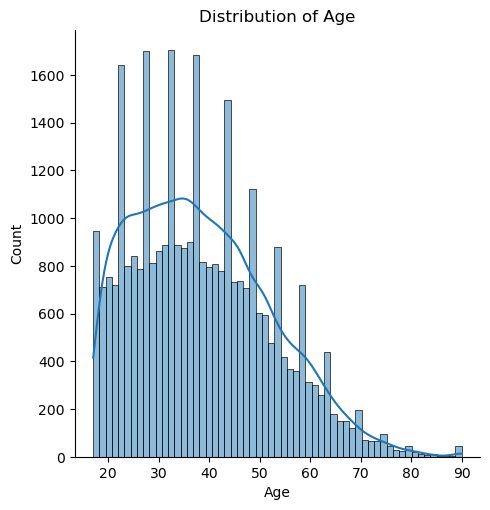

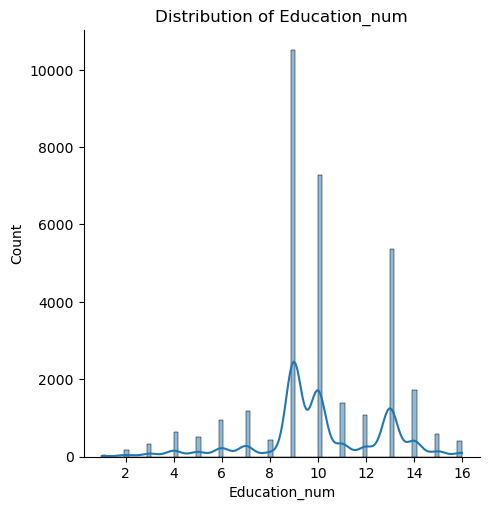

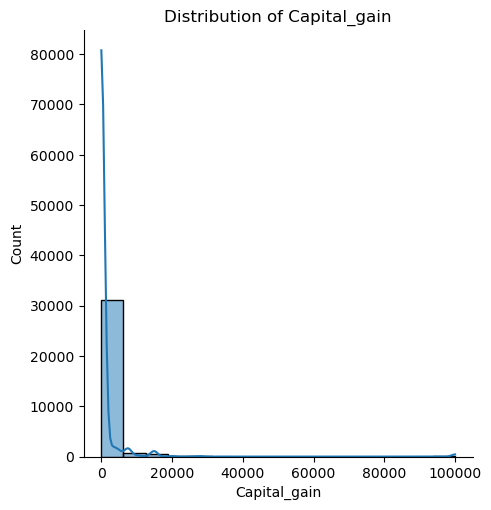

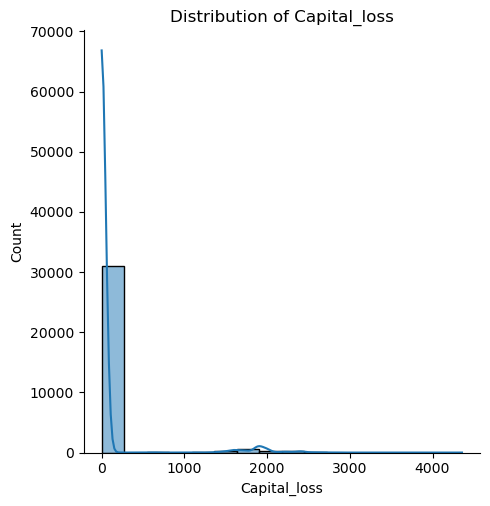

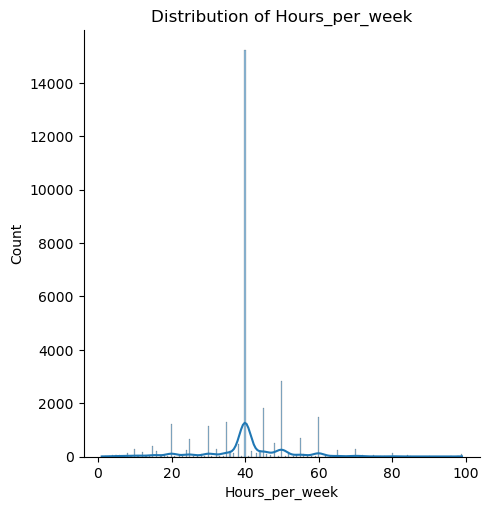

In [21]:
# The numerical columns from DataFrame
numerical_columns = ['Age', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']

for column in numerical_columns:
    sns.displot(df[column], kde=True) 
    plt.title(f'Distribution of {column}')
    plt.show()


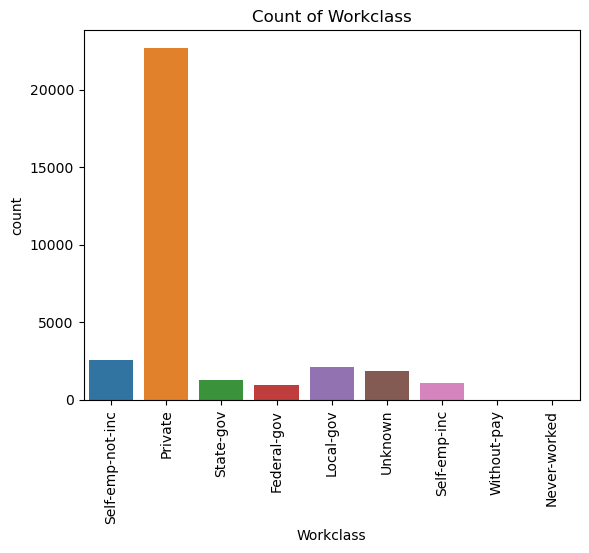

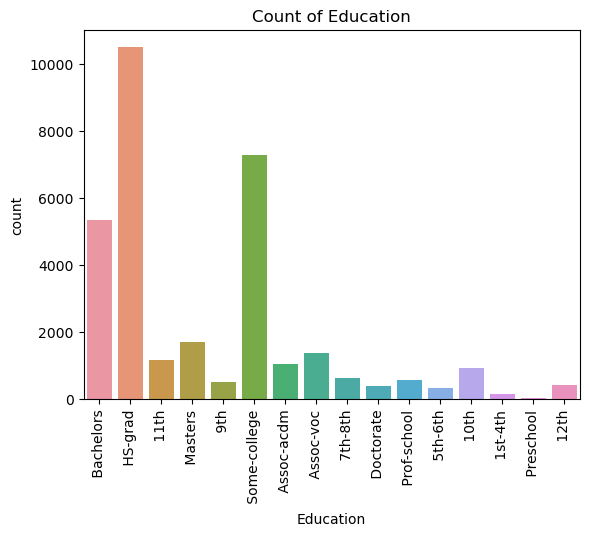

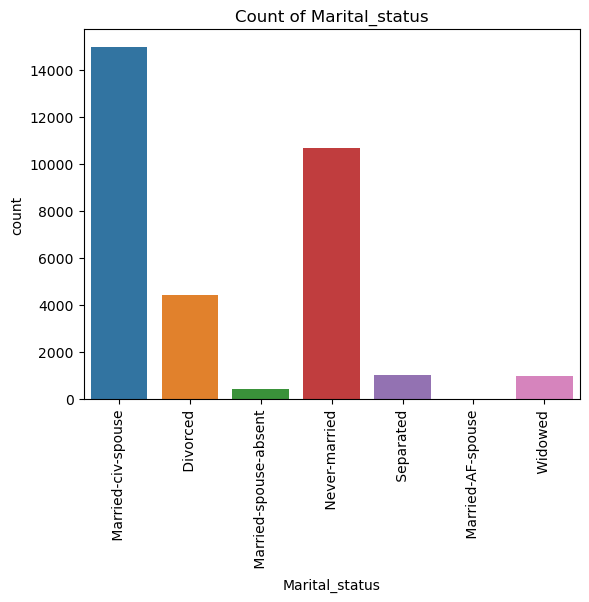

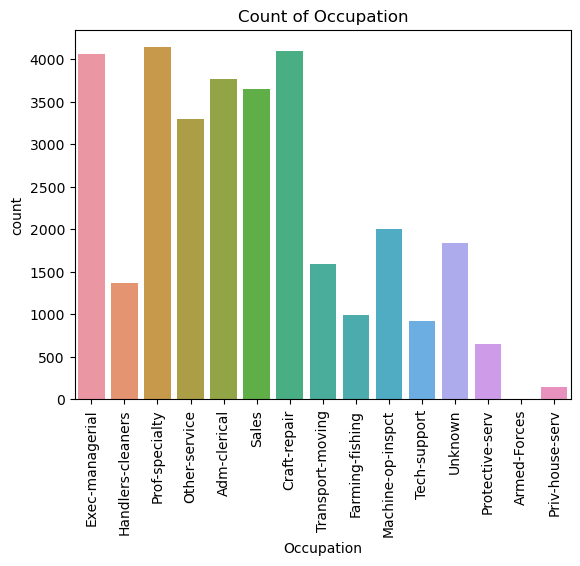

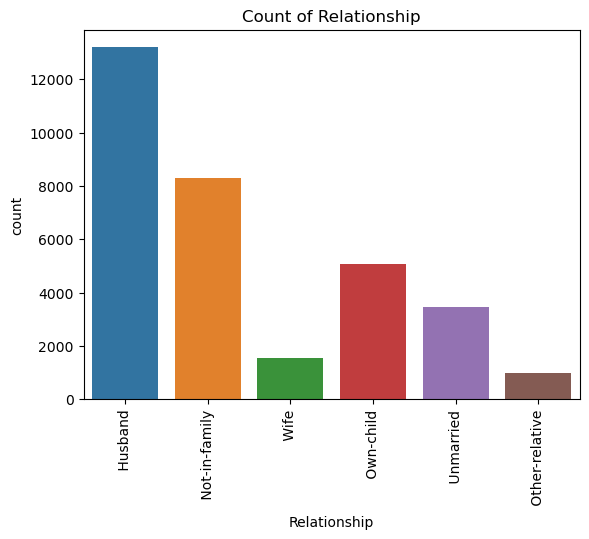

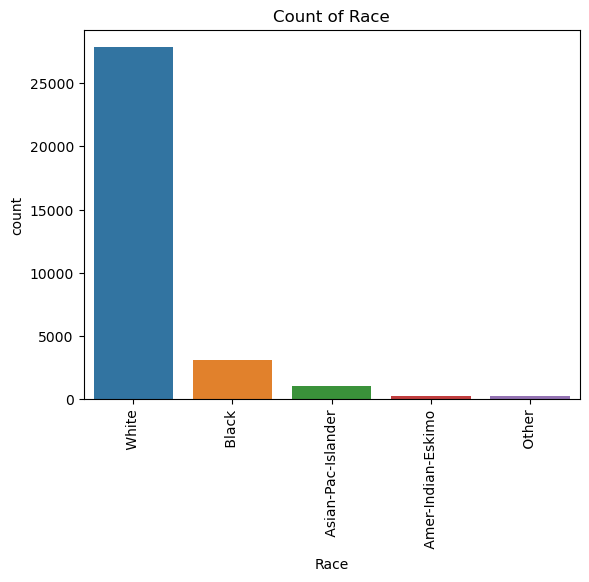

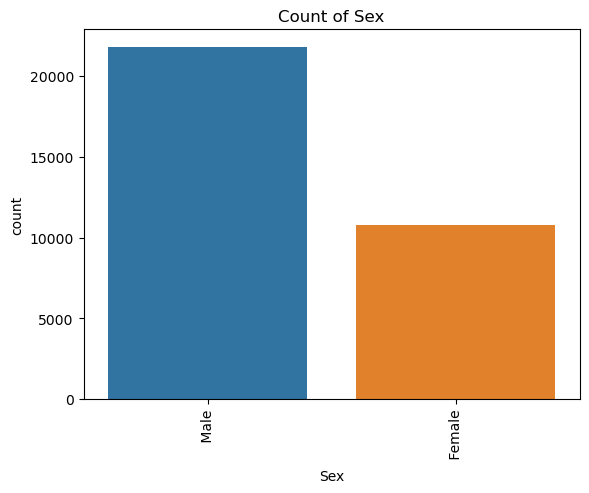

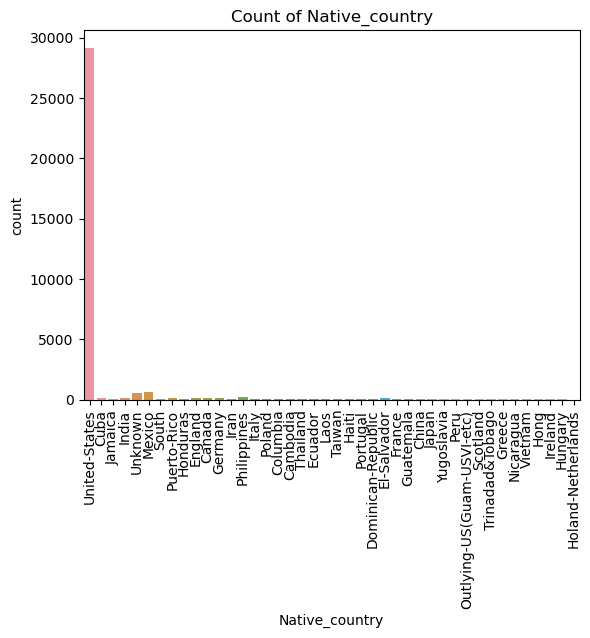

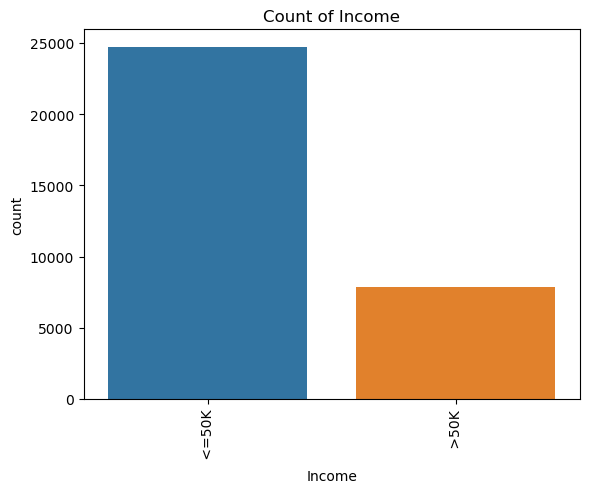

In [22]:
# Select the categorical columns from your DataFrame
categorical_columns = ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']

# Loop through the categorical columns and create count plots
for column in categorical_columns:
    sns.countplot(data=df, x=column)
    plt.title(f'Count of {column}')
    plt.xticks(rotation=90)
    plt.show()


2.Using Multivariate Plots

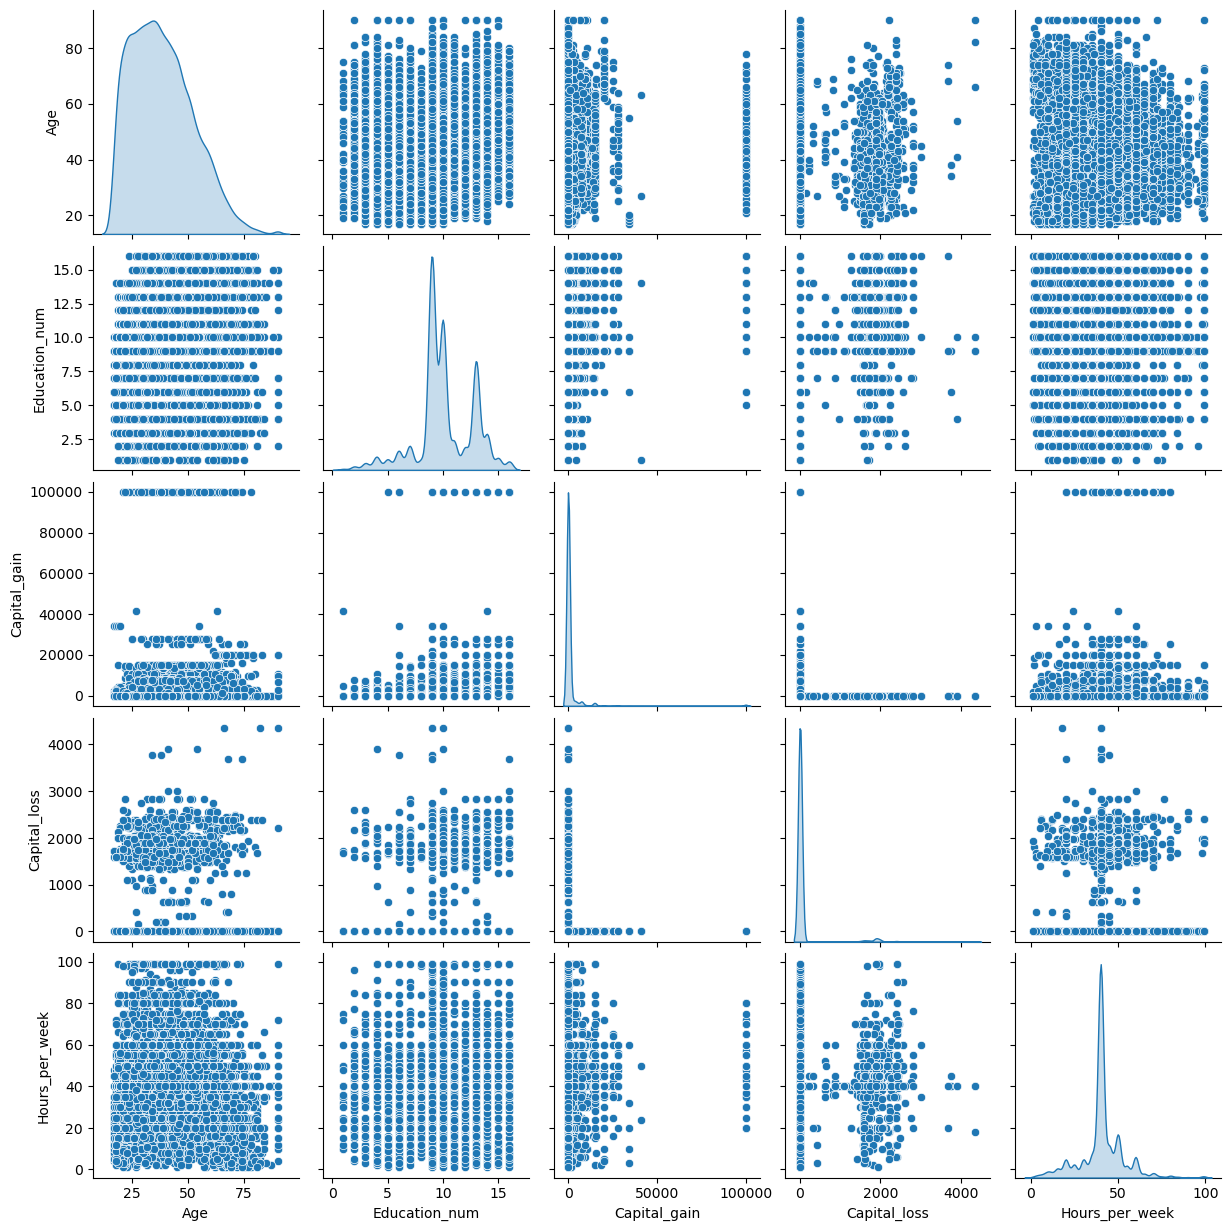

In [23]:
# Pairplot for pairwise relationships between numeric features
sns.pairplot(df , diag_kind='kde')
plt.show()

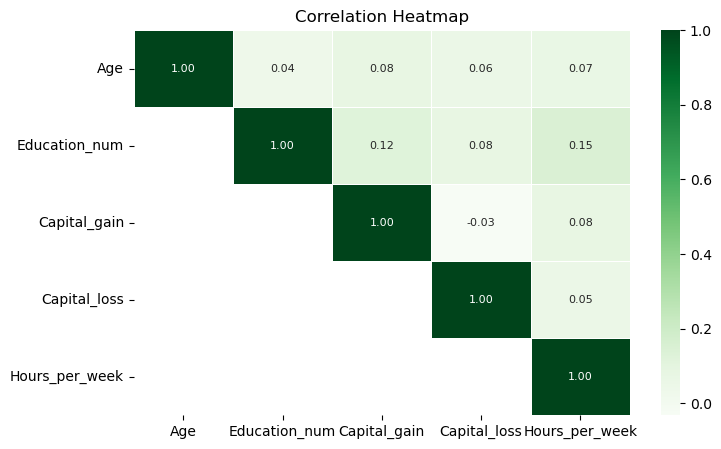

In [24]:
# Heatmap to visualize correlations between features
correlation_matrix = df.corr()

plt.figure(figsize=(8,5))

# Create a mask to hide the lower triangle of the heatmap
mask = np.tri(*correlation_matrix.shape, k=-1, dtype=bool)

sns.heatmap(correlation_matrix, annot=True, cmap='Greens', linewidths=0.5,fmt=".2f", annot_kws={"size": 8}, mask=mask)

plt.yticks(rotation=0)   # Keep y-axis labels horizontal
plt.title('Correlation Heatmap')
plt.show()


We can see that Numerical_columns have not multicolinearity between columns.

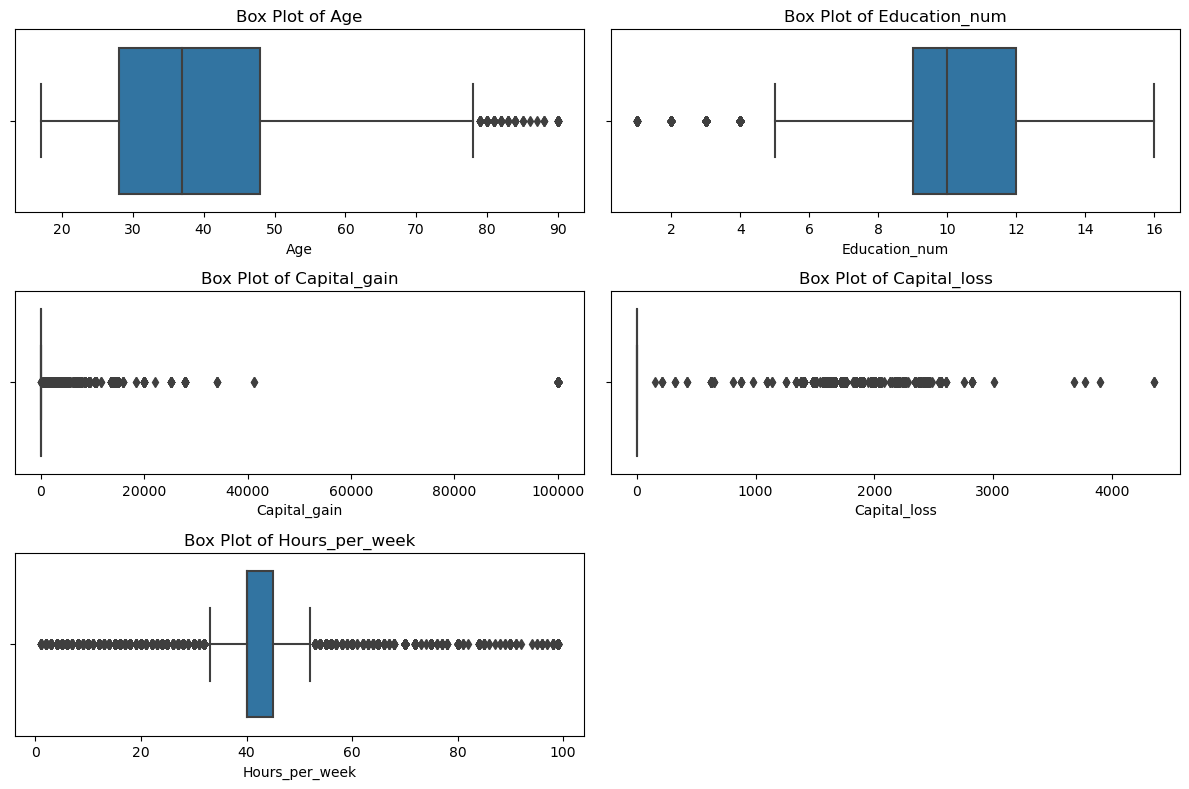

In [25]:
numerical_columns = ['Age', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']

num_cols = 2  
num_rows = (len(numerical_columns) + 1) // num_cols 
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

# Create box plots for each numerical column in subplots
for i, column in enumerate(numerical_columns):
    row = i // num_cols
    col = i % num_cols
    sns.boxplot(x=column, data=df, ax=axes[row, col])
    axes[row, col].set_title(f'Box Plot of {column}')

# Remove any empty subplots
for i in range(len(numerical_columns), num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    fig.delaxes(axes[row, col])

plt.tight_layout()  
plt.show()


data is highly right-skewed, in case for 'Capital_gain' and 'Capital_loss'. We will use some transformation for this.
While 'Age','Education_num','Hours_per_week' represent valid data points for respective fields, show uniquness in dataset.

skewness removal

In [26]:
# Calculate the skewness of each column
skewness = df.skew()
print("Skewness of Columns:")
print(skewness)

Skewness of Columns:
Age                0.558738
Education_num     -0.311630
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
dtype: float64


In [27]:
# Apply log transformation to 'Capital_gain' and 'Capital_loss' column
df['Capital_gain'] = np.log1p(df['Capital_gain'])
df['Capital_loss'] = np.log1p(df['Capital_loss'])

Encoding 

In [28]:
import category_encoders as ce

categorical_columns = ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Native_country']

# Create a binary encoder instance
encoder = ce.BinaryEncoder(cols=categorical_columns)

# Fit and transform the encoder on our DataFrame and replace the original DataFrame
df = encoder.fit_transform(df)


In [29]:
# Apply one-hot encoding to a binary data column
df = pd.get_dummies(df, columns=['Sex'], prefix=['Sex'], drop_first=True)

In [30]:
df.head()

,Age,Workclass_0,Workclass_1,Workclass_2,Workclass_3,Education_0,Education_1,Education_2,Education_3,Education_4,...,Capital_loss,Hours_per_week,Native_country_0,Native_country_1,Native_country_2,Native_country_3,Native_country_4,Native_country_5,Income,Sex_ Male
0,50,0,0,0,1,0,0,0,0,1,...,0.0,13,0,0,0,0,0,1,<=50K,1
1,38,0,0,1,0,0,0,0,1,0,...,0.0,40,0,0,0,0,0,1,<=50K,1
2,53,0,0,1,0,0,0,0,1,1,...,0.0,40,0,0,0,0,0,1,<=50K,1
3,28,0,0,1,0,0,0,0,0,1,...,0.0,40,0,0,0,0,1,0,<=50K,0
4,37,0,0,1,0,0,0,1,0,0,...,0.0,40,0,0,0,0,0,1,<=50K,0


Normalization of data

We use Standard Scaler instead using Min-Max Scaler for less effected by outliers and normal distribution around mean=0 ,std=1.

In [31]:
from sklearn.preprocessing import StandardScaler

# Split the data into features (X) and target (y)
x = df.drop(columns='Income')
Y = df["Income"]


In [32]:
# Normalize the feature columns using StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(x)

5.Model Development

5.1 Testing Candidate models

In [33]:
#Importing Machine learning Model library
from sklearn.svm  import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier , AdaBoostClassifier , BaggingClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score,roc_curve

Splitting Data into train test

In [34]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.30, random_state=59)

Classification Algorithms

Logistics Regression

In [35]:
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('Logistics Regression')
print('Accuracy Score :', accuracy_score(Y_test, y_pred))
print('Confusion matrix :',confusion_matrix(Y_test, y_pred))

Logistics Regression
Accuracy Score : 0.8437755937755937
Confusion matrix : [[6870  505]
 [1021 1372]]


Decision Tree Classifier

In [36]:
DTC=DecisionTreeClassifier()
DTC.fit(X_train,Y_train)
y_pred=DTC.predict(X_test)
print('Decision Tree Classifier')
print('Accuracy Score :', accuracy_score(Y_test, y_pred))

Decision Tree Classifier
Accuracy Score : 0.8115274365274365


Random Forest Classifier

In [37]:
RFC=RandomForestClassifier()
RFC.fit(X_train,Y_train)
y_pred=RFC.predict(X_test)
print('Random Forest Classifier')
print('Accuracy Score :', accuracy_score(Y_test, y_pred))
Accu = accuracy_score(Y_test, y_pred)

Random Forest Classifier
Accuracy Score : 0.8482800982800983


AdaBoost Classifier

In [38]:
Abc=AdaBoostClassifier()
Abc.fit(X_train,Y_train)
y_pred=Abc.predict(X_test)
print('AdaBoost Classifier')
print('Accuracy Score :', accuracy_score(Y_test, y_pred))

AdaBoost Classifier
Accuracy Score : 0.8561629811629812


Support Vector Machine Classifier

In [39]:
svc= SVC()
svc.fit(X_train,Y_train)
y_pred = svc.predict(X_test)
print('Support Vector Machine Classifier')
print('Accuracy Score :', accuracy_score(Y_test, y_pred))

Support Vector Machine Classifier
Accuracy Score : 0.8413185913185913


Bagging Classifier

In [40]:
BC= BaggingClassifier()
BC.fit(X_train,Y_train)
y_pred = BC.predict(X_test)
print('Bagging Classifier')
print('Accuracy Score :', accuracy_score(Y_test, y_pred))
Accub = accuracy_score(Y_test, y_pred)

Bagging Classifier
Accuracy Score : 0.8407043407043407


AdaBoost Classifier gives highest Accuracy Score : 0.8561 .

Cross Validation Score

In [41]:
from sklearn.model_selection import cross_val_score

In [42]:
# cross validation score for Logistics Regression
# By default CV=5 and Scoring parameter is accuracy 

score= cross_val_score(log_reg,X,Y)
print(score)
print(score.mean())
print('Difference between accuracy score and cross validation score is -', Accu-score.mean() )

[0.8404484  0.83814496 0.83998771 0.84060197 0.84090909]
0.8400184275184275
Difference between accuracy score and cross validation score is - 0.008261670761670836


In [43]:
# cross validation score for random forest classifier
score= cross_val_score(RFC,X,Y)
print(score)
print(score.mean())
print('Difference between accuracy score and cross validation score is -', Accu-score.mean() )

[0.85227273 0.84382678 0.84520885 0.85350123 0.8531941 ]
0.8496007371007371
Difference between accuracy score and cross validation score is - -0.0013206388206388198


In [44]:
# cross validation score for Bagging Classifier
score= cross_val_score(BC,X,Y)
print(score)
print(score.mean())
print('Difference between accuracy score and cross validation score is -',Accub-score.mean() )

[0.84505528 0.83461302 0.83875921 0.84720516 0.84275184]
0.8416769041769043
Difference between accuracy score and cross validation score is - -0.0009725634725635812


In [45]:
# cross validation score for AdaBoost Classifier
score= cross_val_score(Abc,X,Y)
print(score)
print(score.mean())
print('Difference between accuracy score and cross validation score is -',Accub-score.mean() )

[0.85257985 0.8519656  0.85872236 0.86302211 0.86056511]
0.8573710073710072
Difference between accuracy score and cross validation score is - -0.016666666666666496


In [46]:
# cross validation score for Support Vector Machine Classifier
score= cross_val_score(svc,X,Y)
print(score)
print(score.mean())
print('Difference between accuracy score and cross validation score is -',Accub-score.mean() )

[0.84505528 0.84198403 0.84996929 0.84981572 0.84444103]
0.8462530712530713
Difference between accuracy score and cross validation score is - -0.005548730548730507


So our best model is AdaBoost Classifier which have less difference between accuracy score and cross validation score.
also accuracy is high among all classification models.

5.2 Hyperparameter tuning and Performance of model

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define a parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of weak learners (decision trees)
    'learning_rate': [0.01, 0.1, 1.0] 
}


In [49]:
grid_search = GridSearchCV(Abc, param_grid, cv=5, scoring='accuracy')

# Fit the model with hyperparameter tuning
grid_search.fit(X_train, Y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Instantiate a new AdaBoost Classifier with the best hyperparameters
best_Abc = AdaBoostClassifier(**best_params)

# Fit the model on the training data
best_Abc.fit(X_train, Y_train)

# Make predictions on the test data
y_pred = best_Abc.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy on Test Data:", accuracy)

Best Hyperparameters: {'learning_rate': 1.0, 'n_estimators': 200}
Accuracy on Test Data: 0.8624078624078624


Final Model

In [50]:
best_hyperparameters = grid_search.best_params_

In [51]:
Final_model = AdaBoostClassifier(**best_hyperparameters, random_state=59)
Final_model.fit(X_train,Y_train)
y_pred=Final_model.predict(X_test)
print('Final Model AdaBoost Classifier')
print('Accuracy Score :', accuracy_score(Y_test, y_pred))
print('Confusion matrix :',confusion_matrix(Y_test, y_pred))
print('classification Report :',classification_report(Y_test, y_pred))

Final Model AdaBoost Classifier
Accuracy Score : 0.8624078624078624
Confusion matrix : [[6995  380]
 [ 964 1429]]
classification Report :               precision    recall  f1-score   support

       <=50K       0.88      0.95      0.91      7375
        >50K       0.79      0.60      0.68      2393

    accuracy                           0.86      9768
   macro avg       0.83      0.77      0.80      9768
weighted avg       0.86      0.86      0.86      9768



5.3 Saving model

In [52]:
import joblib 
joblib.dump(Final_model,'Census Income Project.pkl')

['Census Income Project.pkl']

5.4 Predicting the Final Model

In [53]:
prediction = Final_model.predict(X_test)

In [54]:
Actual = np.array(Y_test)
df_pred = pd.DataFrame()
df_pred["Predicted Income"] = prediction
df_pred["Actual Income"] = Actual
df_pred.head(10)

,Predicted Income,Actual Income
0,<=50K,<=50K
1,<=50K,<=50K
2,>50K,>50K
3,<=50K,<=50K
4,<=50K,<=50K
5,<=50K,<=50K
6,<=50K,<=50K
7,<=50K,<=50K
8,<=50K,<=50K
9,<=50K,<=50K


We can see that model prediction is good. We can easily classify the <=50K and >50K class of Census Income.